Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [2]:
# imports
import pandas as pd
import sqlite3
from sqlite3 import Error
import seaborn as sns

In [3]:
bike_stations_df = pd.read_csv('bike_stations.csv', index_col = 0)
yelp_business_df = pd.read_csv('yelp_business.csv', index_col = 0)

In [4]:
Business_and_Bike_Stations_df = pd.merge(yelp_business_df, bike_stations_df, on = 'Station Name')
Business_and_Bike_Stations_df = Business_and_Bike_Stations_df.drop(columns=['Latitude', 'Longitude'])

In [5]:
Business_and_Bike_Stations_df['Number of Bikes'] = Business_and_Bike_Stations_df['Available Bikes'] + Business_and_Bike_Stations_df['Empty Slots']
Business_and_Bike_Stations_df

,Station Name,Station Latitude,Station Longitude,Business Category,Business Name,Rating,Number of Reviews,Address,Contact,Available Bikes,Empty Slots,Number of Bikes
0,W 100 St & Manhattan Ave,40.795000,-73.96450,Sardinian,Arco Cafe,4.5,352,886 Amsterdam Ave,(646) 781-9080,5,29,34
1,W 100 St & Manhattan Ave,40.795000,-73.96450,Bars,The Calaveras,4.5,231,949 Columbus Ave,(646) 484-6533,5,29,34
2,W 100 St & Manhattan Ave,40.795000,-73.96450,Vietnamese,Saiguette,4.5,729,935 Columbus Ave,(212) 866-6888,5,29,34
3,W 100 St & Manhattan Ave,40.795000,-73.96450,Comfort Food,Jacob's Pickles,4.0,5403,509 Amsterdam Ave,(212) 470-5566,5,29,34
4,W 100 St & Manhattan Ave,40.795000,-73.96450,Burgers,Bareburger - Upper West Side,3.5,393,795 Columbus Ave,(646) 559-2986,5,29,34
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,Ft. Hamilton Pkwy & E 5 St,40.649037,-73.97673,Coffee & Tea,Der Pioneer,4.5,166,737 Church Ave,(347) 435-0132,21,0,21
29996,Ft. Hamilton Pkwy & E 5 St,40.649037,-73.97673,Chinese,Asia Harbor,4.0,148,402 Church Ave,(718) 871-0635,21,0,21
29997,Ft. Hamilton Pkwy & E 5 St,40.649037,-73.97673,Thai,Uni Thai Bistro,4.5,40,265 E 7th St,(929) 419-5642,21,0,21
29998,Ft. Hamilton Pkwy & E 5 St,40.649037,-73.97673,Korean,Jiku Wicked Wings & Korean Grub,4.0,134,1219 Church Ave,(718) 975-2259,21,0,21


In [45]:
Business_and_Bike_Stations_df.to_csv('Business_and_Bike_Stations.csv')

In [6]:
grouped_business = Business_and_Bike_Stations_df.groupby('Station Name').agg({
    'Rating': 'mean',
    'Number of Reviews': 'mean',
    'Number of Bikes': 'max'
}).reset_index()

grouped_business = grouped_business.rename(columns={
    'Rating': 'Average Rating',
    'Number of Reviews': 'Average Reviews',
})
grouped_business_df = pd.DataFrame(grouped_business)
print(grouped_business_df)

                     Station Name  Average Rating  Average Reviews  \
0                1 Ave & E 110 St           4.375           345.00   
1                 1 Ave & E 16 St           4.375          1545.35   
2                 1 Ave & E 18 St           4.400          1483.45   
3                 1 Ave & E 30 St           4.350          1066.85   
4                 1 Ave & E 62 St           4.300           713.90   
..                            ...             ...              ...   
995        Wolcott St & Dwight St           4.200           557.20   
996      Woodward Ave & Harman St           4.350           258.35   
997     Wyckoff Av & Jefferson St           4.300           311.30   
998      Wyckoff Av & Stanhope St           4.275           307.90   
999  Wythe Ave & Metropolitan Ave           4.175           827.80   

     Number of Bikes  
0                 24  
1                 51  
2                 49  
3                 35  
4                 31  
..               ... 

In [49]:
grouped_business_df.to_csv('grouped_business.csv')

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [7]:
Business_and_Bike_Stations_df.shape

(30000, 12)

In [8]:
Business_and_Bike_Stations_df['Station Name'].describe()

count                        30000
unique                        1000
top       India St & Manhattan Ave
freq                            60
Name: Station Name, dtype: object

In [9]:
Business_and_Bike_Stations_df['Rating'].describe()

count    30000.000000
mean         4.178150
std          0.447524
min          1.000000
25%          4.000000
50%          4.000000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

In [10]:
Business_and_Bike_Stations_df['Number of Bikes'].describe()

count    30000.000000
mean        28.228000
std         15.393546
min          0.000000
25%         19.000000
50%         23.000000
75%         31.000000
max        112.000000
Name: Number of Bikes, dtype: float64

<Axes: xlabel='Number of Bikes', ylabel='Count'>

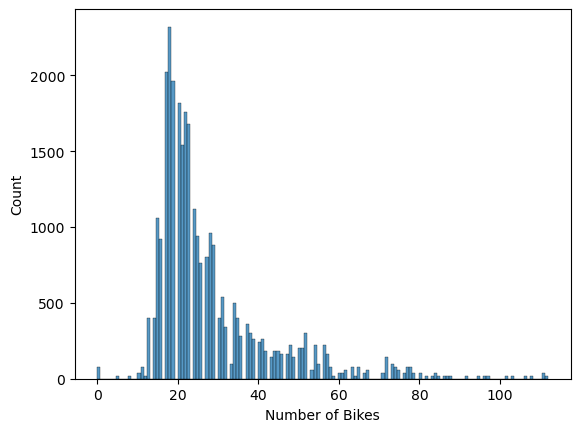

In [11]:
sns.histplot(Business_and_Bike_Stations_df['Number of Bikes'])

<Axes: xlabel='Rating', ylabel='Count'>

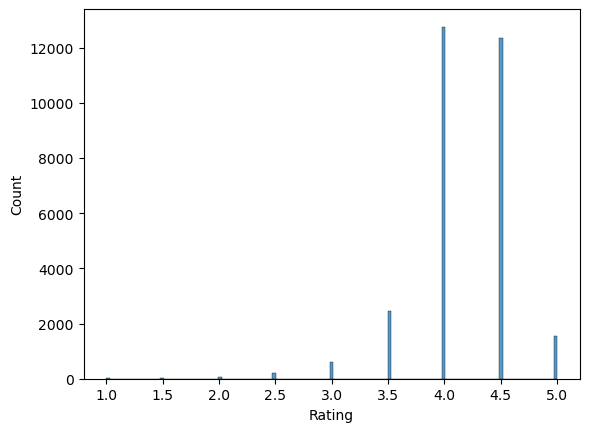

In [37]:
sns.histplot(Business_and_Bike_Stations_df['Rating'])

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [23]:
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [25]:
connection = create_connection("Business_and_Bike_Stations.sqlite")
connect = sqlite3.connect('Business_and_Bike_Stations.sqlite')

Connection to SQLite DB successful


In [26]:
table_name = 'Business_and_Bike_Stations'
Business_and_Bike_Stations_df.to_sql(table_name, connect, if_exists='replace', index=False)

30000

In [31]:
connect.commit()
connect.close()

Look at the data before and after the join to validate your data.

In [18]:
print(len(bike_stations_df.index))
print(bike_stations_df.shape[0])
print(bike_stations_df.shape[1])
print(bike_stations_df[bike_stations_df.columns[0]].count())

1979
1979
5
1979


In [21]:
print(len(yelp_business_df.index))
print(yelp_business_df.shape[0])
print(yelp_business_df.shape[1])
print(yelp_business_df[yelp_business_df.columns[0]].count())

30000
30000
9
30000


In [20]:
print(len(Business_and_Bike_Stations_df.index))
print(Business_and_Bike_Stations_df.shape[0])
print(Business_and_Bike_Stations_df.shape[1])
print(Business_and_Bike_Stations_df[Business_and_Bike_Stations_df.columns[0]].count())

30000
30000
11
30000
